# **Activity:** Real-time Object Detection with YOLO



### **Option: Master's in Artificial Intelligence / Data Science**

In this option, the work will be developed **locally on your personal computers**.

#### Objective
Design a **specific object detection application** using YOLO (You Only Look Once), focused on **a limited subset of classes**. The system must show that **it only detects the activated classes**, visually ignoring objects belonging to deactivated classes (even if they are present in the image).

#### Instructions

1. **Define a concrete application and the problem it solves**, for example: vehicle detection, fruits detection, etc.
2. **Select between 2 and 4 classes** from the YOLOv8 model to detect.
3. **Modify the model logic** or post-processing so that **only the selected classes are shown**.
4. Run the application on video where **objects from non-activated classes** are also present to demonstrate that the system **ignores those classes**.
5. Show the results clearly, visually indicating the detected and non-detected objects.

#### Technical Requirements

- Use `ultralytics` with `YOLO` in any version.
- You can use your webcam video or local video (no static images allowed).

#### Deliverable

Must be uploaded to the virtual classroom:

- **Jupyter Notebook in PDF format** containing:
- Commented code
- Application title and the problem it solves
- List of activated classes
- Screenshots or test images with results showing:
  - Objects *correctly detected* according to the activated classes.
  - Objects *not detected* because they belong to deactivated classes (even if present in the image).

### **Grading Rubric**

| **Criteria** | **Points** | **Description** |
|-------------|-----------|----------------|
| **1. Application Definition and Problem Statement** | 1 | Clearly defines a specific object detection application and its practical use case. Selects appropriate classes for the application context. |
| **2. Class Selection and Justification** | 1 | Selects between 2-4 relevant classes from YOLOv8 model. Demonstrates thoughtful choice of classes for the specific application. |
| **3. Implementation** | 4 | Successfully modifies the model logic or post-processing to only show selected classes. Code is functional and properly ignores non-selected classes. |
| **4. Testing & Evidence** | 3 | Provides a clear test showing both detected (activated classes) and ignored (deactivated classes) objects. Evidence demonstrates the filtering works correctly. |
| **5. Documentation** | 1 | Delivers complete documentation including PDF notebook, application title, class list, and proper screenshots. Submission is well-organized and professional. |

Total: 10 points

# Detección en tiempo real de gatos y perros en Quito

## Problema
En Quito es muy común ver perros y gatos en las calles, sobre todo en barrios como Chillogallo, La Roldós, Pisulí o Cochapamba. Muchos viven sin cuidado, buscan comida en la basura o sufren maltrato.  
Esto genera problemas de salud, accidentes, peleas y contaminación. En algunos lugares incluso se han encontrado decenas de animales viviendo juntos en malas condiciones.

## ¿Quién usaría este proyecto y para qué?
- **Municipio / Unidad de Bienestar Animal:** para identificar zonas con más presencia de animales callejeros, planificar campañas y tener evidencia visual para reportes o sanciones.  
- **Fundaciones y rescatistas (como PAE):** para registrar casos de abandono o maltrato y medir cuántos animales aparecen en una zona antes y después de una campaña.

## ¿Cómo lo usarían realmente?
Este sistema está pensado para **ahorrar tiempo y organizar la información**.  
Por ejemplo:
- Si una fundación coloca cámaras en puntos estratégicos o recibe videos de vecinos, el sistema puede **contar automáticamente** cuántos perros o gatos aparecen y **guardar solo los cuadros donde hay animales**.  
- Esto evita revisar horas de grabación y ayuda a **detectar patrones**, como zonas con más movimiento o aumento de animales.  
- Los resultados se pueden usar para **decidir dónde enviar brigadas, esterilizar o rescatar**.

El proyecto convierte los videos comunes en **información útil** para tomar decisiones rápidas y basadas en datos reales.


### **Step 1: Install Required Packages**

Install the necessary packages including OpenCV and other dependencies:

In [1]:
# %pip install --upgrade ultralytics
# %pip install opencv-python
# %pip install matplotlib
# %pip install numpy==1.26.4 --force-reinstall

Verify the installations:

In [2]:
%pip show opencv-python ultralytics

Name: opencv-python
Version: 4.9.0.80
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: d:\archivos de usuario\documents\artificial-intelligence\ai_env\lib\site-packages
Requires: numpy
Required-by: retina-face, ultralytics
---
Name: ultralytics
Version: 8.3.221
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: d:\archivos de usuario\documents\artificial-intelligence\ai_env\lib\site-packages
Requires: matplotlib, numpy, opencv-python, pillow, polars, psutil, pyyaml, requests, scipy, torch, torchvision, ultralytics-thop
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### **Step 2: Import Required Libraries**

Import the libraries you will use:

In [3]:
import numpy as np
import math
import cv2
from ultralytics import YOLO
# Detección en webcam dentro de Jupyter SIN cv2.imshow y liberando cámara siempre
import matplotlib.pyplot as plt
import gc

plt.ion()  # modo interactivo de matplotlib

### **Step 3: Load the YOLOv11 Model**

Load the pre-trained YOLOv11 model (automatically downloads if not available):

In [4]:
# Load a pretrained YOLO model version 11, nano (n) size
model = YOLO('yolo11s.pt')  # Using nano version for speed, other options: yolov11s.pt (small), yolov11m.pt (medium), yolov11l.pt (large), yolov11x.pt (extra large)

In [5]:
# Show class names the model can detect
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

## Clases activadas

Se activaron solo las clases **“cat” (15)** y **“dog” (16)**, porque son los animales más comunes en las calles de Quito y los que más preocupan por abandono y reproducción sin control. Al limitar el modelo a estas dos clases, el sistema se enfoca solo en lo necesario y evita distracciones con otros objetos que no interesan en este caso.


## Detección en cámara

Aquí se usa la cámara en vivo.  
El modelo analiza cada cuadro y **solo muestra gatos y perros**.  
Todo lo demás (personas, autos, etc.) se ignora.  
Esto permite probar el sistema directamente desde la laptop o cámara sin grabar videos largos.


### **Step 4.1: Run YOLO model on your webcam (ONLY selected classes)**

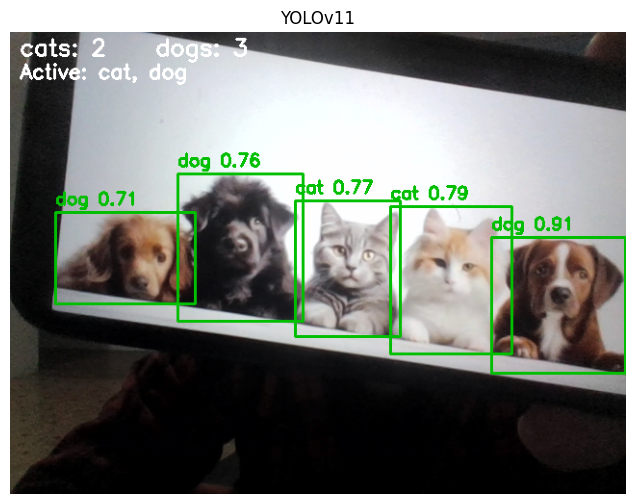

Detection stopped by user.
Webcam released and resources cleaned.


In [6]:
from IPython.display import display, update_display

# Clases activas: cat=15, dog=16
ACTIVE_IDS = [15, 16]
ACTIVE_NAMES = [model.names[i] for i in ACTIVE_IDS]

# Parámetros de inferencia
CONF, IOU = 0.35, 0.50

# Vista inline en notebook (sin cv2.imshow)
plt.ioff()
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("YOLOv11")
ax.axis("off")
im = None
handle = display(fig, display_id=True)

# Abrir webcam
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,  640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
if not cap.isOpened():
    raise RuntimeError("Could not open webcam. Try index 1 or check permissions.")

try:
    while True:
        ok, frame = cap.read()
        if not ok:
            print("End of capture or read error.")
            break

        # Inferencia SOLO en clases activas
        filtered_results = model(frame, conf=CONF, iou=IOU,
                                 classes=ACTIVE_IDS, verbose=False)

        # Dibujo + conteo por frame
        out = frame.copy()
        cats = 0
        dogs = 0
        if len(filtered_results):
            r = filtered_results[0]
            if r.boxes is not None:
                for box in r.boxes:
                    cls = int(box.cls[0])
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
                    conf = float(box.conf[0])
                    name = model.names.get(cls, str(cls))

                    # Contadores por clase
                    if cls == 15:  # cat
                        cats += 1
                    elif cls == 16:  # dog
                        dogs += 1

                    # Caja y etiqueta
                    cv2.rectangle(out, (x1, y1), (x2, y2), (0, 190, 0), 2)
                    cv2.putText(out, f"{name} {conf:.2f}", (x1, max(y1-8, 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 190, 0), 2)

        # Overlay informativo
        cv2.putText(out, f"cats: {cats}    dogs: {dogs}", (10, 24),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        cv2.putText(out, f"Active: {', '.join(ACTIVE_NAMES)}", (10, 48),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Mostrar inline
        frame_rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
        if im is None:
            im = ax.imshow(frame_rgb)
        else:
            im.set_data(frame_rgb)
        fig.canvas.draw()
        update_display(fig, display_id=handle.display_id)

except KeyboardInterrupt:
    print("Detection stopped by user.")
finally:
    cap.release()
    plt.close(fig)
    del cap, im, fig, ax, handle
    gc.collect()
    print("Webcam released and resources cleaned.")


## Resultados en tiempo real

Durante las pruebas con cámara, el sistema detecta solo gatos y perros.  
Se muestran cuadros verdes con sus nombres y la confianza del modelo.  
Además, aparece un pequeño contador en la esquina con el número de cada especie.

Esto sirve para verificar rápidamente si el sistema está funcionando bien antes de analizar videos más largos.

## Detección en video

En esta parte se usa un video grabado (por ejemplo, de un barrio o parque).  
El sistema analiza todo el video, pero **solo guarda los cuadros donde realmente aparecen gatos o perros**.  
Así se obtiene un video más corto y útil, con la información relevante lista para revisar.

In [7]:
# Guarda un MP4 anotado en otra carpeta y con el mismo nombre base del video de entrada.

from pathlib import Path
import cv2

VIDEO_PATH = r"D:\Archivos de Usuario\Documents\Artificial-Intelligence\Lab06\videos\video4.mp4"
ACTIVE_IDS = [15, 16]  # cat, dog

# Parámetros de inferencia
CONF, IOU = 0.35, 0.60
IMGSZ = 320
MAX_DET = 40
VID_STRIDE = 3
AGNOSTIC_NMS = False
STREAM_BUFFER = False
SAVE_ONLY_WITH_DETECTIONS = True

# carpeta + nombre
in_path = Path(VIDEO_PATH)
OUT_DIR = Path("./outputs")  # carpeta de salida
OUT_DIR.mkdir(parents=True, exist_ok=True)
OUT_VIDEO = OUT_DIR / f"{in_path.stem}_cats_dogs.mp4"

# Video props (para FPS y tamaño)
cap = cv2.VideoCapture(str(in_path))
if not cap.isOpened():
    raise RuntimeError(f"Could not open video: {in_path}")

src_fps = cap.get(cv2.CAP_PROP_FPS) or 25.0
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.release()

out_fps = max(1.0, src_fps / max(1, VID_STRIDE))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")

# Se crea solo cuando haya algo útil que escribir
writer = None

# Inferencia (stream)
results_gen = model.predict(
    source=str(in_path),
    stream=True,
    classes=ACTIVE_IDS,
    conf=CONF,
    iou=IOU,
    imgsz=IMGSZ,
    max_det=MAX_DET,
    agnostic_nms=AGNOSTIC_NMS,
    vid_stride=VID_STRIDE,
    stream_buffer=STREAM_BUFFER,
    device="cpu",
    verbose=False
)

frames_written = 0
total_frames = 0

for r in results_gen:
    total_frames += 1

    # Frame anotado por Ultralytics (cajas + etiquetas)
    annotated_bgr = r.plot()

    # Conteo por frame (cats, dogs)
    cats = 0
    dogs = 0
    if r.boxes is not None and len(r.boxes):
        cls_np = r.boxes.cls.int().cpu().numpy().tolist()
        cats = cls_np.count(15)
        dogs = cls_np.count(16)

    # Overlay con conteos y clases activas
    cv2.putText(annotated_bgr, f"cats: {cats}    dogs: {dogs}", (10, 24),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv2.putText(annotated_bgr, "Active: cat, dog", (10, 48),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Escribir solo cuando hay detecciones (solo información útil)
    has_det = (cats + dogs) > 0
    if (not SAVE_ONLY_WITH_DETECTIONS) or has_det:
        if writer is None:
            writer = cv2.VideoWriter(str(OUT_VIDEO), fourcc, out_fps, (W, H))
            if not writer.isOpened():
                raise RuntimeError(f"Could not create output video: {OUT_VIDEO}")
        writer.write(annotated_bgr)
        frames_written += 1

if writer is not None:
    writer.release()

print(f"Done. Processed frames: {total_frames}  Saved frames: {frames_written}\n{OUT_VIDEO.resolve()}")


Done. Processed frames: 615  Saved frames: 240
D:\Archivos de Usuario\Documents\Artificial-Intelligence\Lab06\outputs\video4_cats_dogs.mp4


## Resultados

El video final muestra las detecciones con cuadros y nombres.  
Se incluyen los conteos de gatos y perros por cuadro.  
Esto permite estimar cuántos animales aparecen en una zona y usar esos datos como base para reportes o decisiones.

Por ejemplo:
- Si en un video del sur se detectan muchos animales, se puede **priorizar esa zona** para campañas.  
- Si después de una jornada los conteos bajan, significa que **la intervención funcionó**.


# Conclusiones

- El sistema logra detectar **solo gatos y perros**, ignorando todo lo demás.  
- Puede ser una herramienta útil para **fundaciones y autoridades** que trabajan en control y rescate de animales.  
- Ahorra tiempo al analizar videos, porque **solo guarda los momentos donde realmente aparecen animales**.  
- Permite tener **videos y conteos claros** que sirven como evidencia para reportes o decisiones.  
- En el futuro, se podría ampliar el proyecto para **registrar en qué zonas aparecen más animales** y así planificar mejor las campañas de ayuda.
